In [38]:
import pandas as pd

Cargar el archivo CSV y mostrar las primeras filas

In [39]:
#CARGA DE CSV
data = pd.read_csv(rf'C:\Users\ashli\OneDrive\Escritorio\LaSalle\7TO\MineríaDatos\3P\data.csv')

In [41]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517677.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,444450.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1106379.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259329.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,736598.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


Verificación de que el csv cumpla con los criterios 

In [ ]:
# Verificar las dimensiones del dataset
print("Dimensiones del dataset:", data.shape)

Dimensiones del dataset: (5770, 8)


In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
                                   title   type                     genres  \
0                      The Fifth Element  movie  Action, Adventure, Sci-Fi   
1                             Unforgiven  movie             Drama, Western   
2  Eternal Sunshine of the Spotless Mind  movie     Drama, Romance, Sci-Fi   
3                  A History of Violence  movie       Action, Crime, Drama   
4                  2001: A Space Odyssey  movie          Adventure, Sci-Fi   

   releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
0       1997.0  tt0119116                7.6      517677.0   
1       1992.0  tt0105695                8.2      444450.0   
2       2004.0  tt0338013                8.3     1106379.0   
3       2005.0  tt0399146                7.4      259329.0   
4       1968.0  tt0062622                8.3      736598.0   

                                  availableCountries  
0                                     DK, FI, NO, SE  
1  AD, AG, AR, BB, B

In [ ]:
# Resumen estadístico de las variables
print("Resumen estadístico:")
print(data.describe())

Resumen estadístico:
       releaseYear  imdbAverageRating  imdbNumVotes
count  5757.000000        5334.000000  5.334000e+03
mean   2013.778357           6.661286  6.941072e+04
std      11.959838           1.043081  1.937345e+05
min    1903.000000           1.500000  5.000000e+00
25%    2010.000000           6.000000  3.002500e+02
50%    2018.000000           6.700000  2.339500e+03
75%    2022.000000           7.400000  4.018000e+04
max    2025.000000           9.400000  2.965480e+06


In [ ]:
# Verificar tipos de datos
print("Tipos de datos:")
print(data.dtypes)

Tipos de datos:
title                  object
type                   object
genres                 object
releaseYear           float64
imdbId                 object
imdbAverageRating     float64
imdbNumVotes          float64
availableCountries     object
dtype: object


2. Modelado de Datos en Esquema Estrella

In [ ]:
print(data.columns)

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


In [ ]:
# Crear tabla de hechos (Fact Table)
fact_table = data[['title', 'releaseYear', 'imdbId', 'imdbAverageRating', 'imdbNumVotes']].copy()

In [ ]:
# Crear tablas de dimensiones (Dimensiones relacionadas)
dim_type = data[['type']].drop_duplicates().reset_index(drop=True)
dim_genres = data[['genres']].drop_duplicates().reset_index(drop=True)
dim_countries = data[['availableCountries']].drop_duplicates().reset_index(drop=True)

In [ ]:
# Mostrar ejemplos de las tablas generadas
print("Tabla de hechos (Fact Table):")
print(fact_table.head())


Tabla de hechos (Fact Table):
                                   title  releaseYear     imdbId  \
0                      The Fifth Element       1997.0  tt0119116   
1                             Unforgiven       1992.0  tt0105695   
2  Eternal Sunshine of the Spotless Mind       2004.0  tt0338013   
3                  A History of Violence       2005.0  tt0399146   
4                  2001: A Space Odyssey       1968.0  tt0062622   

   imdbAverageRating  imdbNumVotes  
0                7.6      517677.0  
1                8.2      444450.0  
2                8.3     1106379.0  
3                7.4      259329.0  
4                8.3      736598.0  


In [ ]:
print("\nTabla Dimensión - Type:")
print(dim_type.head())


Tabla Dimensión - Type:
    type
0  movie
1     tv


In [ ]:
print("\nTabla Dimensión - Genres:")
print(dim_genres.head())


Tabla Dimensión - Genres:
                      genres
0  Action, Adventure, Sci-Fi
1             Drama, Western
2     Drama, Romance, Sci-Fi
3       Action, Crime, Drama
4          Adventure, Sci-Fi


In [ ]:
print("\nTabla Dimensión - Countries:")
print(dim_countries.head())


Tabla Dimensión - Countries:
                                  availableCountries
0                                     DK, FI, NO, SE
1  AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR...
2  AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT...
3  AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC...
4  AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR...


3. Limpieza y Transformación de Datos


Corregimos el código para trabajar con las columnas actualizadas:

In [ ]:
# Identificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
title                 227
type                    0
genres                124
releaseYear            13
imdbId                368
imdbAverageRating     436
imdbNumVotes          436
availableCountries      0
dtype: int64


In [ ]:
# Manejar valores nulos (por ejemplo, reemplazar con media o eliminar filas)
data_cleaned = data.fillna({
    'imdbId': 'Unknown',  # Reemplazar IDs faltantes con "Unknown"
    'imdbAverageRating': data['imdbAverageRating'].mean(),
    'imdbNumVotes': 0  # Reemplazar con 0 si faltan votos
})

In [ ]:
# Eliminar duplicados
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
# Normalizar datos numéricos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cleaned[['imdbAverageRating', 'imdbNumVotes']] = scaler.fit_transform(
    data_cleaned[['imdbAverageRating', 'imdbNumVotes']]
)

# Verificar los datos limpios
print("Datos después de la limpieza:")
print(data_cleaned.head())

Datos después de la limpieza:
                                   title   type                     genres  \
0                      The Fifth Element  movie  Action, Adventure, Sci-Fi   
1                             Unforgiven  movie             Drama, Western   
2  Eternal Sunshine of the Spotless Mind  movie     Drama, Romance, Sci-Fi   
3                  A History of Violence  movie       Action, Crime, Drama   
4                  2001: A Space Odyssey  movie          Adventure, Sci-Fi   

   releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
0       1997.0  tt0119116           0.772152      0.174568   
1       1992.0  tt0105695           0.848101      0.149875   
2       2004.0  tt0338013           0.860759      0.373086   
3       2005.0  tt0399146           0.746835      0.087449   
4       1968.0  tt0062622           0.860759      0.248391   

                                  availableCountries  
0                                     DK, FI, NO, SE  
1  AD, AG, AR, BB,

4. Gráficos Exploratorios

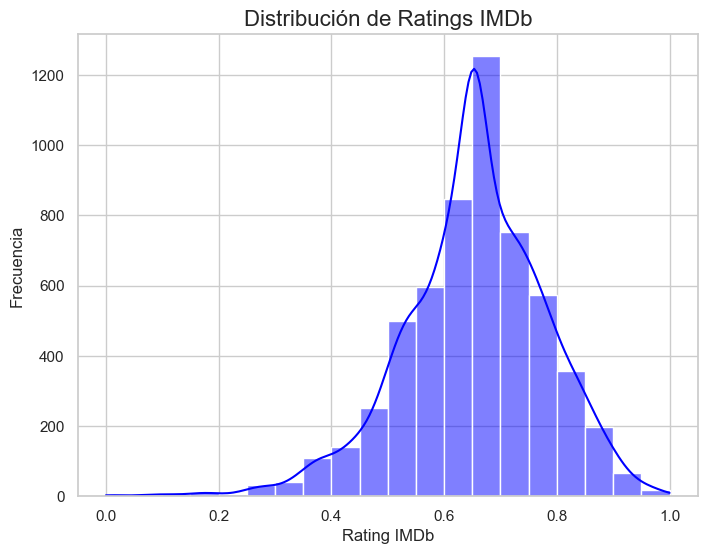

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para seaborn
sns.set(style="whitegrid")

# 1. Distribución de ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=data_cleaned, x='imdbAverageRating', bins=20, kde=True, color='blue')
plt.title('Distribución de Ratings IMDb', fontsize=16)
plt.xlabel('Rating IMDb', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

C:\Users\ashli\AppData\Local\Temp\ipykernel_14832\3696706389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='type', palette='pastel')


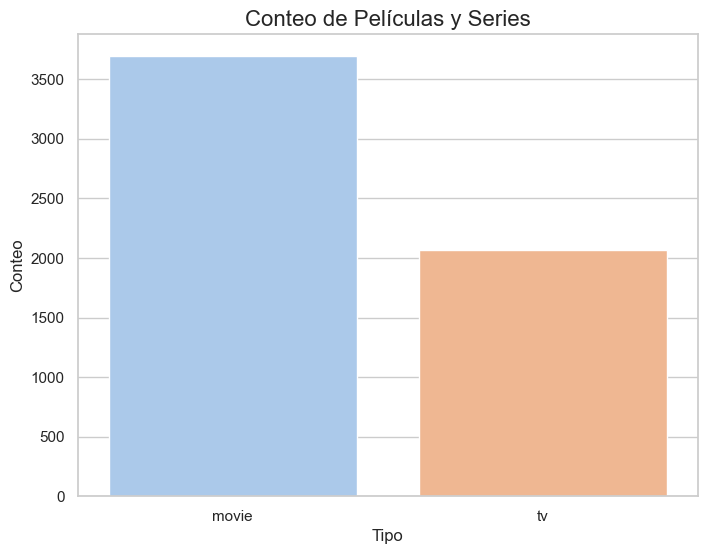

In [ ]:
# 2. Conteo de películas y series
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='type', palette='pastel')
plt.title('Conteo de Películas y Series', fontsize=16)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()

C:\Users\ashli\AppData\Local\Temp\ipykernel_14832\3696706389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='type', palette='pastel')


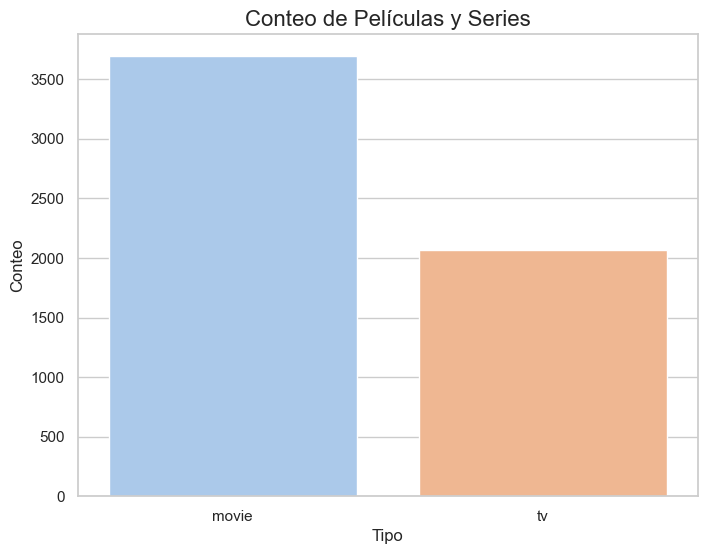

In [ ]:
# 2. Conteo de películas y series
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='type', palette='pastel')
plt.title('Conteo de Películas y Series', fontsize=16)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()

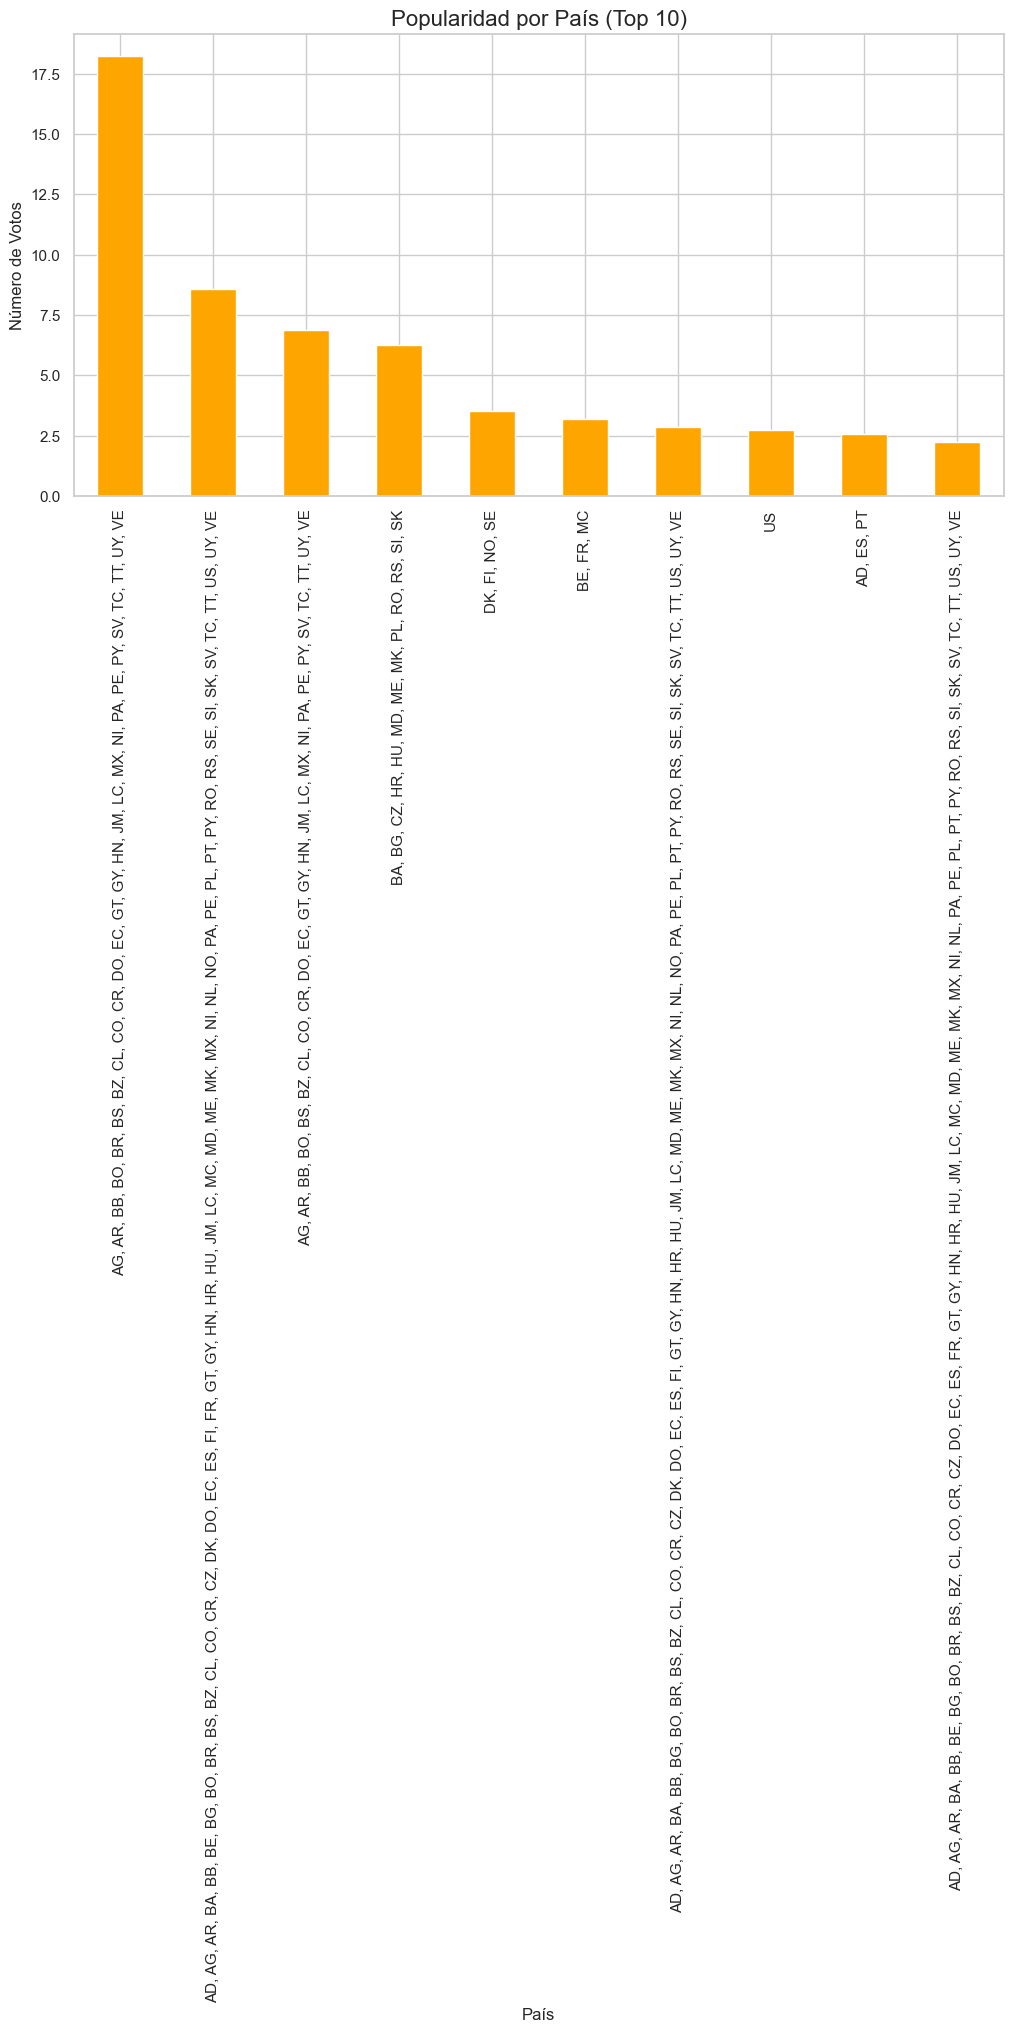

In [ ]:
# 4. Popularidad (número de votos) por país
plt.figure(figsize=(12, 6))
country_votes = data_cleaned.groupby('availableCountries')['imdbNumVotes'].sum().sort_values(ascending=False)[:10]
country_votes.plot(kind='bar', color='orange')
plt.title('Popularidad por País (Top 10)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Votos', fontsize=12)
plt.show()

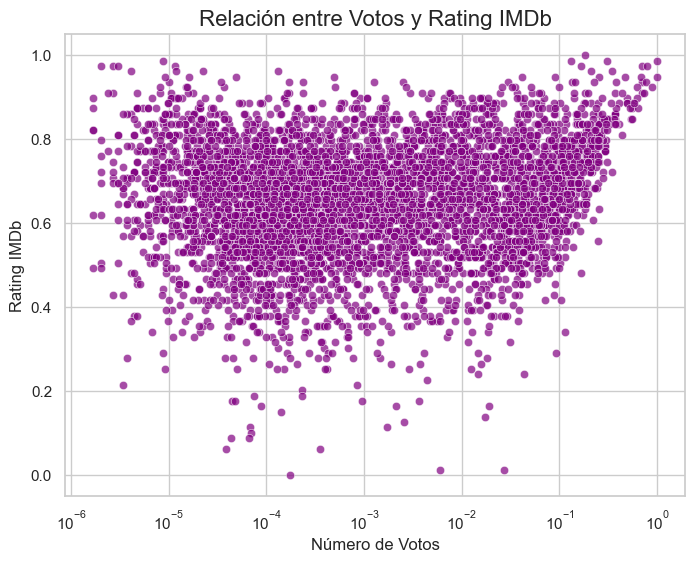

In [ ]:
# 5. Relación entre votos y rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='imdbNumVotes', y='imdbAverageRating', alpha=0.7, color='purple')
plt.title('Relación entre Votos y Rating IMDb', fontsize=16)
plt.xlabel('Número de Votos', fontsize=12)
plt.ylabel('Rating IMDb', fontsize=12)
plt.xscale('log')  # Escala logarítmica para votos
plt.show()

5. Análisis de Clustering con K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Seleccionar columnas relevantes para clustering
clustering_data = data_cleaned[['imdbAverageRating', 'imdbNumVotes']]


In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


In [ ]:
# Método del codo para determinar el número óptimo de clusters
inertia = []
k_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

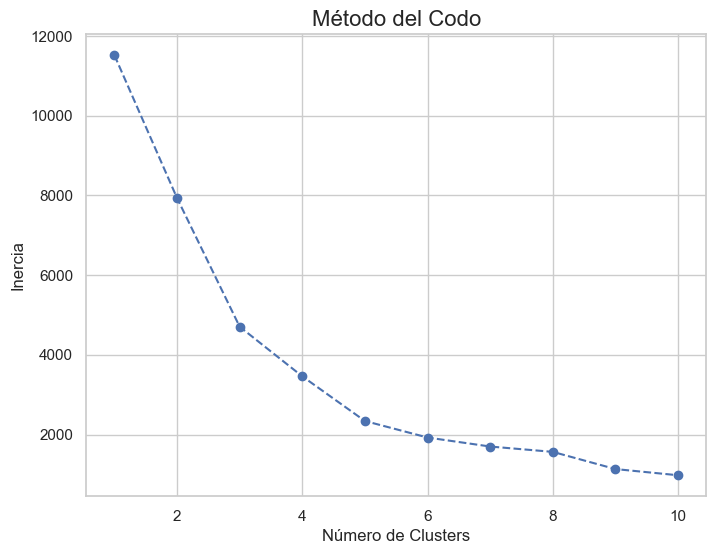

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo', fontsize=16)
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.show()

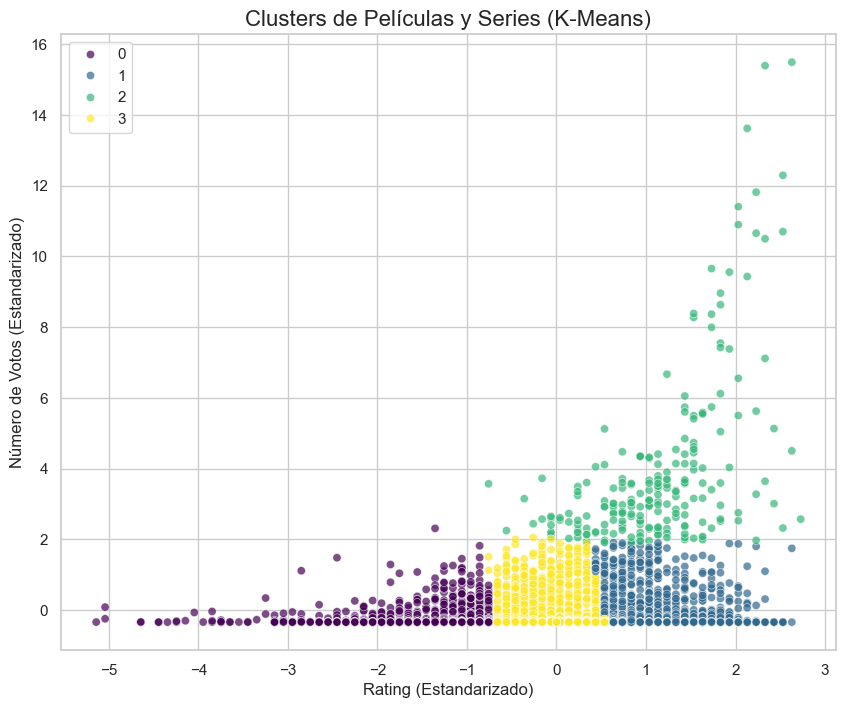

In [ ]:
# Implementar K-Means con el número óptimo de clusters (ajustar según el método del codo)
optimal_k = 4  # Cambiar este valor según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Agregar los clusters al dataset original
data_cleaned['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=clustering_data_scaled[:, 0], y=clustering_data_scaled[:, 1],
    hue=clusters, palette='viridis', alpha=0.7
)
plt.title('Clusters de Películas y Series (K-Means)', fontsize=16)
plt.xlabel('Rating (Estandarizado)', fontsize=12)
plt.ylabel('Número de Votos (Estandarizado)', fontsize=12)
plt.show()

6. Modelos de Regresión Lineal

6.1. Regresión Lineal Simple (RLS)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables para regresión simple
X_simple = data_cleaned[['imdbNumVotes']]  # Variable independiente
y_simple = data_cleaned['imdbAverageRating']  # Variable dependiente


In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo de regresión lineal
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Hacer predicciones
y_pred_simple = model_simple.predict(X_test)

Regresión Lineal Simple (RLS):
Error cuadrático medio (MSE): 0.0161
Coeficiente de determinación (R²): 0.0665


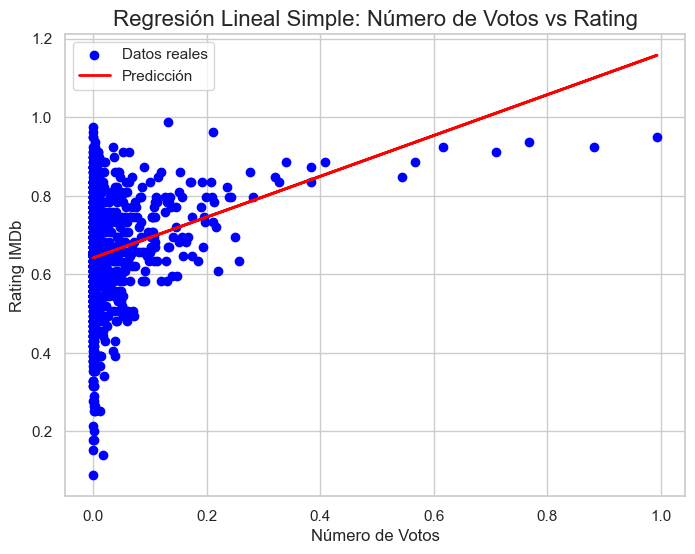

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_simple)
r2 = r2_score(y_test, y_pred_simple)

print(f"Regresión Lineal Simple (RLS):")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicción')
plt.title('Regresión Lineal Simple: Número de Votos vs Rating', fontsize=16)
plt.xlabel('Número de Votos', fontsize=12)
plt.ylabel('Rating IMDb', fontsize=12)
plt.legend()
plt.show()

6.2. Regresión Lineal Múltiple (RLM)

In [ ]:
# Convertir la columna 'type' a variables numéricas (dummy variables)
data_cleaned['type_numeric'] = data_cleaned['type'].map({'movie': 0, 'tv': 1})


In [ ]:
# Seleccionar variables para regresión múltiple
X_multiple = data_cleaned[['imdbNumVotes', 'releaseYear', 'type_numeric']]  # Variables independientes
y_multiple = data_cleaned['imdbAverageRating']  # Variable dependiente


In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo de regresión lineal múltiple
#model_multiple = LinearRegression()
#model_multiple.fit(X_train, y_train)